# 0. Libraries and importing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import itertools
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from group_lasso import GroupLasso
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Training datasets

### Preprocessing version 3

In [2]:
df_v3 = pd.read_csv('2_preprocessed_datasets/v3_prepr-no_ohe-no_num_supm-with_num_rooms_outliers.csv')

# Convert the 'floor' column to string, removing the decimal point but keeping NaN values
df_v3['floor'] = df_v3['floor'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

df_v3

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,floor
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,3
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,7
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1
3,6088,1.0,2.0,41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,6
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,9
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,9
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,9
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,8


In [4]:
print(df_v3.isin([np.nan]).sum())

id                  0
num_rooms           0
num_baths         160
square_meters     155
orientation      2341
year_built        170
is_furnished      165
has_pool          156
neighborhood      165
num_crimes        160
has_ac            169
accepts_pets      155
price               0
floor             149
dtype: int64


In [5]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8000 non-null   int64  
 1   num_rooms      8000 non-null   float64
 2   num_baths      7840 non-null   float64
 3   square_meters  7845 non-null   float64
 4   orientation    5659 non-null   object 
 5   year_built     7830 non-null   float64
 6   is_furnished   7835 non-null   object 
 7   has_pool       7844 non-null   object 
 8   neighborhood   7835 non-null   object 
 9   num_crimes     7840 non-null   float64
 10  has_ac         7831 non-null   object 
 11  accepts_pets   7845 non-null   object 
 12  price          8000 non-null   int64  
 13  floor          7851 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 875.1+ KB


### Preprocessing version 4

In [4]:
df_v4 = pd.read_csv('2_preprocessed_datasets/v4_prepr-no_ohe-no_num_supm-no_num_rooms_outliers.csv')

# Convert the 'floor' column to string, removing the decimal point but keeping NaN values
df_v4['floor'] = df_v4['floor'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

df_v4

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,floor
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,3
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,7
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1
3,6088,1.0,2.0,41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,6
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,9
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,9
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,9
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,8


## Utilities
Applicable to both datasets, v3 and v4.

In [5]:
categorical_cols_v3 = ['orientation', 'neighborhood', 'floor']
boolean_cols_v3 = ['is_furnished', 'has_pool', 'has_ac', 'accepts_pets']
numerical_cols_v3 = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes']

features_v3 = numerical_cols_v3 + boolean_cols_v3 + categorical_cols_v3
print(features_v3)

['num_rooms', 'num_baths', 'square_meters', 'year_built', 'num_crimes', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets', 'orientation', 'neighborhood', 'floor']


## Analyzing the test dataset

### Importing the data

In [6]:
df_test = pd.read_csv('../test.csv')
df_test

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets
0,6253,NaN,1.0,152.0,NaN,2012.0,5º - 4a,True,True,Les Cors,0.0,False,False,NaN
1,4685,NaN,2.0,90.0,east,1957.0,10º - 1a,True,False,Ciutat Vella,2.0,False,True,3.0
2,1732,NaN,2.0,86.0,NaN,1991.0,5º - 2a,False,False,Eixample,0.0,False,True,NaN
3,4743,NaN,3.0,164.0,NaN,2002.0,8º - 4a,False,True,Nou Barris,7.0,False,False,NaN
4,4522,NaN,1.0,99.0,NaN,1984.0,8º - 4a,True,True,Sant Andreu,0.0,True,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,5º - 2a,True,True,Sarrià-Sant Gervasi,0.0,True,True,NaN
1996,8286,1.0,2.0,161.0,NaN,1984.0,5º - 1a,True,False,Nou Barris,9.0,False,False,NaN
1997,7854,4.0,3.0,111.0,NaN,1957.0,4º - 2a,True,True,Gràcia,0.0,False,True,NaN
1998,1096,2.0,1.0,154.0,north,2018.0,9º - 1a,False,False,Nou Barris,7.0,False,False,NaN


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2000 non-null   int64  
 1   num_rooms         1809 non-null   float64
 2   num_baths         1960 non-null   float64
 3   square_meters     1957 non-null   float64
 4   orientation       1477 non-null   object 
 5   year_built        1970 non-null   float64
 6   door              1949 non-null   object 
 7   is_furnished      1965 non-null   object 
 8   has_pool          1956 non-null   object 
 9   neighborhood      1965 non-null   object 
 10  num_crimes        1960 non-null   float64
 11  has_ac            1969 non-null   object 
 12  accepts_pets      1955 non-null   object 
 13  num_supermarkets  374 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 218.9+ KB


### Basic EDA and preprocessing of test data

#### Basic description

In [8]:
df_test.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets
count,2000.000000,1809.000000,1960.000000,1957.000000,1970.000000,1960.000000,374.000000
mean,4952.472500,4.533444,2.009184,108.396014,1985.505584,2.666837,1.989305
std,2884.100313,12.016357,0.812685,37.519266,20.703724,3.389128,0.808728
min,1.000000,1.000000,1.000000,-95.000000,1950.000000,0.000000,1.000000
25%,2463.500000,2.000000,1.000000,79.000000,1968.000000,0.000000,1.000000
50%,4950.500000,3.000000,2.000000,108.000000,1986.000000,0.000000,2.000000
75%,7488.250000,4.000000,3.000000,139.000000,2003.000000,5.000000,3.000000
max,9999.000000,99.000000,3.000000,170.000000,2021.000000,10.000000,3.000000


#### Outliers

In [9]:
def check_outliers(dataframe):

    # Dictionary to hold the outliers information
    outliers_dict = {}

    for column in list(dataframe.columns):

        # For now, we ignore null values by dropping all observations with null values
        series_no_na = dataframe[column].dropna()

        # Calculate quartiles 25% and 75%
        q25, q75 = np.quantile(series_no_na, 0.25), np.quantile(series_no_na, 0.75)

        # Calculate the IQR
        iqr = q75 - q25

        # Calculate the outlier cutoff (in this case, set at 1.5 times the IQR)
        cut_off = iqr * 1.5

        # Calculate the lower and upper bound value
        lower, upper = q25 - cut_off, q75 + cut_off

        # Find the outliers
        outliers = [x for x in series_no_na if (x >= upper) or (x <= lower)]

        # Store the information in a dictionary, where each column will have its
        # own dictionary
        outliers_dict[column] = {
            'IQR': iqr,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outliers': outliers,
            'Num Outliers': len(outliers),
            'Num Observations': series_no_na.shape[0]
        }

        # We convert the dictionary into a pandas DataFrame
        df_outliers = pd.DataFrame(outliers_dict)

    return df_outliers

In [11]:
# Save data of numerical variables
df_numerical_features = df_test[numerical_cols_v3]

df_outliers = check_outliers(df_numerical_features)

df_outliers

,num_rooms,num_baths,square_meters,year_built,num_crimes
IQR,2.0,2.0,60.0,35.0,5.0
Lower Bound,-1.0,-2.0,-11.0,1915.5,-7.5
Upper Bound,7.0,6.0,229.0,2055.5,12.5
Outliers,"[66.0, 61.0, 50.0, 60.0, 63.0, 74.0, 92.0, 78....",[],"[-36.0, -39.0, -15.0, -12.0, -29.0, -21.0, -92...",[],[]
Num Outliers,54,0,16,0,0
Num Observations,1809,1960,1957,1970,1960


In [12]:
print(len([x for x in df_outliers.loc['Outliers', 'square_meters'] if x <= 0]))

16


In [13]:
print(len([x for x in df_test.loc[:, 'square_meters'] if x <= 0]))

19


There are 19 observations in total with negative values in square meters!

In [14]:
df_test2 = df_test.copy()
df_test2['square_meters'] = df_test2['square_meters'].abs()

# We check that if we have effectively replaced observations with negative sqm
print(len([x for x in df_test2.loc[:, 'square_meters'] if x <= 0]))

0


In [15]:
df_test2_outliers = check_outliers(df_test2[numerical_cols_v3])

df_test2_outliers

,num_rooms,num_baths,square_meters,year_built,num_crimes
IQR,2.0,2.0,60.0,35.0,5.0
Lower Bound,-1.0,-2.0,-11.0,1915.5,-7.5
Upper Bound,7.0,6.0,229.0,2055.5,12.5
Outliers,"[66.0, 61.0, 50.0, 60.0, 63.0, 74.0, 92.0, 78....",[],[],[],[]
Num Outliers,54,0,0,0,0
Num Observations,1809,1960,1957,1970,1960


#### Categorical data

First, we create a new feature of the `floor` of the apartment, which will replace the `door` feature.

In [16]:
df_test3 = df_test2.copy()

# Apply the extraction, but ensure we skip NaN values
df_test3['floor'] = df_test3['door'].str.extract(r'(\d+)º')

# Finally, we drop the feature 'door'
df_test3.drop(labels = 'door', axis = 1, inplace = True)

# Convert the 'floor' column to string, but keep NaN values as they are
df_test3['floor'] = df_test3['floor'].apply(lambda x: str(x) if pd.notnull(x) else x)

In [21]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2000 non-null   int64  
 1   num_rooms         1809 non-null   float64
 2   num_baths         1960 non-null   float64
 3   square_meters     1957 non-null   float64
 4   orientation       1477 non-null   object 
 5   year_built        1970 non-null   float64
 6   is_furnished      1965 non-null   object 
 7   has_pool          1956 non-null   object 
 8   neighborhood      1965 non-null   object 
 9   num_crimes        1960 non-null   float64
 10  has_ac            1969 non-null   object 
 11  accepts_pets      1955 non-null   object 
 12  num_supermarkets  374 non-null    float64
 13  floor             1949 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 218.9+ KB


Now, we look for the relative frequencies of each column:

In [17]:
for column in df_test3[categorical_cols_v3 + boolean_cols_v3].columns:
    print('Relative frequencies of column')
    print(df_test3[column].value_counts(normalize = True))
    print('\n')

Relative frequencies of column
orientation
south    0.264049
west     0.250508
north    0.249831
east     0.235613
Name: proportion, dtype: float64


Relative frequencies of column
neighborhood
Sant Martí             0.112977
Nou Barris             0.106361
Eixample               0.103817
Ciutat Vella           0.102290
Horta                  0.101781
Sant Andreu            0.099746
Sarrià-Sant Gervasi    0.096183
Gràcia                 0.095674
Sants                  0.094656
Les Cors               0.086514
Name: proportion, dtype: float64


Relative frequencies of column
floor
10    0.116983
8     0.104156
7     0.103643
2     0.100051
3     0.099538
6     0.099025
5     0.098512
1     0.097486
9     0.092355
4     0.088250
Name: proportion, dtype: float64


Relative frequencies of column
is_furnished
False    0.501272
True     0.498728
Name: proportion, dtype: float64


Relative frequencies of column
has_pool
False    0.519939
True     0.480061
Name: proportion, dtype: float64


Rel

#### Dropping `num_supermarkets` column

In [18]:
df_test_v1 = df_test3.copy()

# We drop the number of supermarkets column, as it has too many null values
df_test_v1 = df_test_v1.drop(labels = 'num_supermarkets', axis = 1)

df_test_v1

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,floor
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Cors,0.0,False,False,5
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,10
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,5
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,8
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,5
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,5
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,4
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,9


In [10]:
df_test_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   num_rooms      1809 non-null   float64
 2   num_baths      1960 non-null   float64
 3   square_meters  1957 non-null   float64
 4   orientation    1477 non-null   object 
 5   year_built     1970 non-null   float64
 6   is_furnished   1965 non-null   object 
 7   has_pool       1956 non-null   object 
 8   neighborhood   1965 non-null   object 
 9   num_crimes     1960 non-null   float64
 10  has_ac         1969 non-null   object 
 11  accepts_pets   1955 non-null   object 
 12  floor          1949 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 203.3+ KB


#### Save the first version of the test data (df_test_v1)
Changes applied:
1. Negative squared meters have been changed to positive.
2. Created feature `floor`, which extracts the first number of `door`; and dropped `door`.
3. Dropped `num_supermarkets` feature.

In [30]:
df_test_v1.to_csv('../preprocessed_test_data/test_v1.csv')

#### Treating the outliers in `num_rooms`

The idea is to fill the outliers in `num_rooms` with the same median as the one we applied for the training dataset v4 (2):

In [1]:
def detect_outliers_iqr(data, column_name, threshold=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    return outliers

def impute_outliers_with_constant(data, column_name, outliers, number_to_impute):

    # Impute the mean to the outliers
    data.loc[outliers.index, column_name] = number_to_impute

    return data

In [19]:
outliers_num_rooms = detect_outliers_iqr(df_test_v1, 'num_rooms')
df_test_v2 = df_test_v1.copy()
df_test_v2 = impute_outliers_with_constant(df_test_v2, 'num_rooms', outliers_num_rooms, 2)
df_test_v2

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,floor
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Cors,0.0,False,False,5
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,10
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,5
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,8
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,5
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,5
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,4
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,9


#### Save the second version of the test data (df_test_v2)
Changes applied:
1. Negative squared meters have been changed to positive.
2. Created feature `floor`, which extracts the first number of `door`; and dropped `door`.
3. Dropped `num_supermarkets` feature.
4. Imputed outliers of `num_rooms` with the same median as the one of the training dataset.

In [21]:
df_test_v2.to_csv('../preprocessed_test_data/test_v2.csv')

# 5. Training of the final model
Once the best features are selected, we can train the model with the full dataset, and without splitting the data (as we will have considered potential overfitting already in the feature selection step).After performing feature selection through regularization methods like Lasso or Ridge, the next step depends on your objective:
- Using the selected features:
    - The typical next step is to train a new linear regression model (without regularization) using the entire dataset but only the features that were selected (non-zero coefficients) by Lasso or Ridge. This approach ensures that the model uses the most relevant features, as identified by the regularization process, while potentially improving interpretability and performance.
    - This is recommended because Lasso and Ridge modify the coefficients by shrinking them, and you might want to get a better estimate of the coefficients on the unpenalized model, now that you know which features are most important.
- Using the regularized model's coefficients:
    - Alternatively, you could keep the coefficients from the best-performing Lasso or Ridge model directly and use them. This is useful if you want to retain the regularization benefits to control overfitting or maintain stability when dealing with collinearity.

In summary, the more common practice is to retrain the linear regression on the selected features without regularization, but keeping the Lasso or Ridge model is also valid if you need the benefits of regularization. For example, see the pipeline of cross-validation suggested by scikit-learn (https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation):
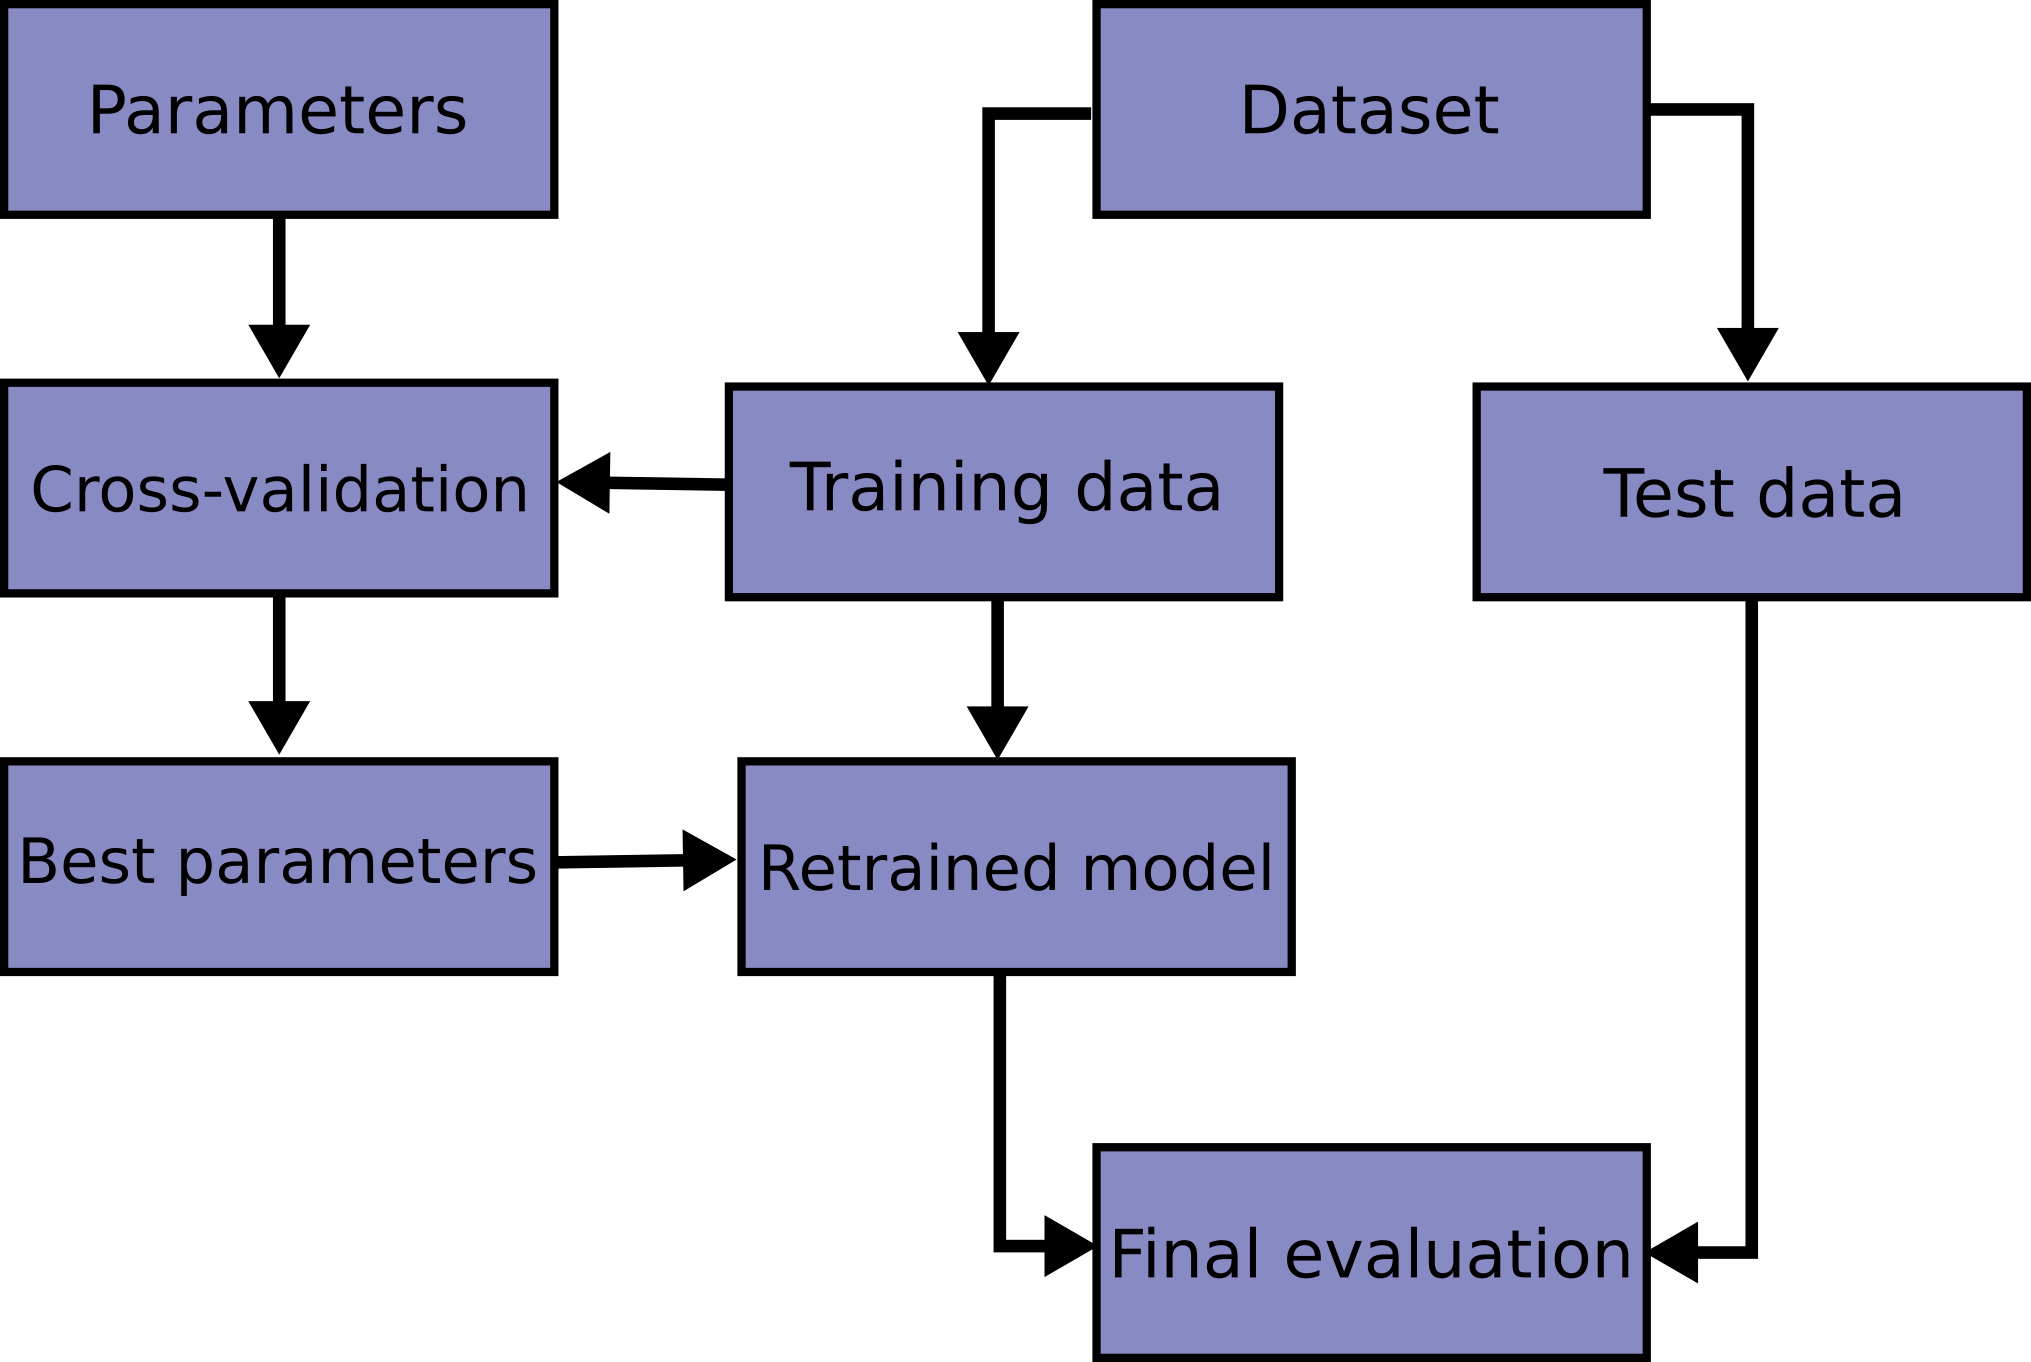

## Function 4. Training and prediction with results of function 4
Training the whole dataset with the optimal hyperparameters. 

Optimal alpha found: *0.09541*; optimal group regularization parameter: *2.811769e-08*.

### Training with the whole df_v3 dataset
In the function below, we:
1. Fit the pipeline on the full training data.
2. Transform the test data using the preprocessor from the fitted pipeline to ensure consistency.
3. Predict the target on the test data.

In [42]:
def group_lasso_prediction(
        df_train: pd.DataFrame, df_test: pd.DataFrame,
        numerical_features: list[str], boolean_features: list[str], 
        categorical_features: list[str],target: str,
        my_alpha: float, my_group_reg_param: float, use_imputers: bool = True, 
        my_n_neighbors: int = 5, max_n_lasso_iter: int = 100
        ):

    # Create transformers for categorical and numerical features
    numerical_transformer = [('scaler', StandardScaler())]  # Standardize numerical features
        
    categorical_transformer = [('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))]  # One-hot encode categorical features, dropping first dummy

    if use_imputers == True:
        # Add KNN imputer for numerical features. We append it, so that standardization is
        # performed before KNN Imputing
        numerical_transformer.append(('knn_imputer', KNNImputer(n_neighbors = my_n_neighbors)))
        # Optionally, use SimpleImputer for categorical features instead of KNN. We insert it 
        # BEFORE one-hot encoding the categorical variables
        categorical_transformer.insert(0, ('simple_imputer', SimpleImputer(strategy='most_frequent')))

    # Set the boolean transformer based on use_imputers
    if use_imputers == True:
        # Optionally, use SimpleImputer for boolean features
        boolean_transformer = [('simple_imputer', SimpleImputer(strategy='most_frequent'))]
    else:
        # Pass through boolean features without transformation
        boolean_transformer = [('passthrough', 'passthrough')]

    # Create the ColumnTransformer to apply different transformations to numerical
    # columns, categorical and dummy (boolean) columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(numerical_transformer), numerical_features),
            ('cat', Pipeline(categorical_transformer), categorical_features),
            ('bool', Pipeline(boolean_transformer), boolean_features)
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. It will
    # apply the transformation and imputations (if use_imputers is set to True) 
    # to the different features in the order specified in ColumnTransformer
    steps = [('preprocessor', preprocessor)]
    
    ###########################################################################

    # We create a list with the definition of the groups for GroupLasso

    # First, we initialize the list with the groups for numerical variables
    lasso_groups = [x for x in range(1, len(numerical_features) + 1)]

    # Then, we add to the groups list the boolean variables
    lasso_groups = lasso_groups + [x + len(lasso_groups) for x in range(1, len(boolean_features) + 1)]

    # Finally, we add to the groups list the categorical variables
    # We save the initial length of the groups list in each iteration in the beginning, 
    # so that the length does not change when we add one more for each category below
    start_cat_index = len(lasso_groups) + 1
    for i, col in enumerate(categorical_features):
        unique_count = df_train[col].nunique(dropna=True)  # Get the number of unique categories, ignoring NaN
        lasso_groups.extend([start_cat_index + i] * (unique_count - 1))  # Assign the same group ID to each unique category 

    ###########################################################################

    # We add Group Lasso to the pipeline, with a specific alpha and groupreg parameter
    steps.append(('group_lasso', 
                GroupLasso(
                    groups = lasso_groups, 
                    group_reg = my_group_reg_param, 
                    l1_reg = my_alpha, 
                    fit_intercept = True, 
                    n_iter = max_n_lasso_iter,
                    scale_reg = "group_size",
                    supress_warning = True
                    )))
            
    # We create the pipeline with the steps specified above
    pipeline = Pipeline(steps)

    ###########################################################################

    # Fit pipeline on full training data
    pipeline.fit(df_train.drop(columns=[target]), df_train[target])

    # Preprocess (1st) and predict (2nd) on test data
    X_test = df_test.drop(columns=['id'])
    test_predictions = pipeline.predict(X_test)

    # Round and convert predictions to integer
    test_predictions = test_predictions.round().astype(int)

    # Create DataFrame for submission with "id" and "price"
    test_predictions_submit = pd.DataFrame({
        "id": df_test["id"],
        "price": test_predictions
    })

    # Save to CSV
    test_predictions_submit.to_csv("../test_predictions/test_predictions_submit.csv", index=False)

    return test_predictions_submit

### Prediction

In [43]:
test_predictions_v3_f4 = group_lasso_prediction(
    df_train = df_v3, df_test = df_test_v1, numerical_features = numerical_cols_v3, 
    boolean_features = boolean_cols_v3, categorical_features = categorical_cols_v3, 
    target = 'price', my_alpha = 0.09541, my_group_reg_param = 2.811769e-08,
    use_imputers = True, my_n_neighbors = 5, max_n_lasso_iter = 600 
    )

In [44]:
test_predictions_v3_f4

,id,price
0,6253,1380
1,4685,1049
2,1732,1025
3,4743,1333
4,4522,1128
...,...,...
1995,6413,1098
1996,8286,1231
1997,7854,1170
1998,1096,1261


### MSE on the test dataset
MSE after submitting to Kaggle: 30525.06300

## Function 5. Training and prediction with function 5
Features *excluded* in the best model trained with function 5:
1. Numerical: *num_rooms, num_baths*
2. Boolean: *is_furnished, accepts_pets*
3. Categorical: *orientation, neighborhood*

### Utilities

In [45]:
# Features to consider
categorical_cols_v3_f5 = ['floor']
boolean_cols_v3_f5 = ['has_pool', 'has_ac']
numerical_cols_v3_f5 = ['square_meters', 'year_built', 'num_crimes']

### Training with the whole df_v3 dataset
The idea here is to just:
1. Apply necessary transformations and imputations.
2. Train only with the features that gave a better MSE when analyzing the results.

Then, we:
1. Fit the pipeline on the full training data.
2. Transform the test data using the preprocessor from the fitted pipeline to ensure consistency.
3. Predict the target on the test data.

In [46]:
def lin_reg_prediction(
        df_train: pd.DataFrame, df_test: pd.DataFrame,
        numerical_features: list[str], boolean_features: list[str], 
        categorical_features: list[str],target: str,
        use_imputers: bool = True, my_n_neighbors: int = 5
        ):

    # Create transformers for categorical and numerical features
    numerical_transformer = [('scaler', StandardScaler())]  # Standardize numerical features
        
    categorical_transformer = [('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))]  # One-hot encode categorical features, dropping first dummy

    if use_imputers == True:
        # Add KNN imputer for numerical features. We append it, so that standardization is
        # performed before KNN Imputing
        numerical_transformer.append(('knn_imputer', KNNImputer(n_neighbors = my_n_neighbors)))
        # Optionally, use SimpleImputer for categorical features instead of KNN. We insert it 
        # BEFORE one-hot encoding the categorical variables
        categorical_transformer.insert(0, ('simple_imputer', SimpleImputer(strategy='most_frequent')))

    # Set the boolean transformer based on use_imputers
    if use_imputers == True:
        # Optionally, use SimpleImputer for boolean features
        boolean_transformer = [('simple_imputer', SimpleImputer(strategy='most_frequent'))]
    else:
        # Pass through boolean features without transformation
        boolean_transformer = [('passthrough', 'passthrough')]

    # Create the ColumnTransformer to apply different transformations to numerical
    # columns, categorical and dummy (boolean) columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(numerical_transformer), numerical_features),
            ('cat', Pipeline(categorical_transformer), categorical_features),
            ('bool', Pipeline(boolean_transformer), boolean_features)
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. It will
    # apply the transformation and imputations (if use_imputers is set to True) 
    # to the different features in the order specified in ColumnTransformer
    steps = [('preprocessor', preprocessor)]
    
    ###########################################################################

    # We add linear regression to the pipeline
    steps.append(('linreg', LinearRegression(fit_intercept=True)))
            
    # We create the pipeline with the steps specified above
    pipeline = Pipeline(steps)

    ###########################################################################

    # Fit pipeline on full training data
    pipeline.fit(df_train.drop(columns=[target]), df_train[target])

    # Preprocess (1st) and predict (2nd) on test data
    X_test = df_test.drop(columns=['id'])
    test_predictions = pipeline.predict(X_test)

    # Round and convert predictions to integer
    test_predictions = test_predictions.round().astype(int)

    # Create DataFrame for submission with "id" and "price"
    test_predictions_submit = pd.DataFrame({
        "id": df_test["id"],
        "price": test_predictions
    })

    # Save to CSV
    test_predictions_submit.to_csv("../test_predictions/test_predictions_submit.csv", index=False)

    return test_predictions_submit

### Prediction

In [47]:
test_predictions_v3_f5 = lin_reg_prediction(
    df_train = df_v3, df_test = df_test_v1, numerical_features = numerical_cols_v3_f5,
    boolean_features = boolean_cols_v3_f5, categorical_features = categorical_cols_v3_f5,
    target = 'price', use_imputers = True, my_n_neighbors = 5
)

In [48]:
test_predictions_v3_f5

,id,price
0,6253,1385
1,4685,1049
2,1732,1025
3,4743,1326
4,4522,1141
...,...,...
1995,6413,1089
1996,8286,1230
1997,7854,1159
1998,1096,1272


### MSE on the test dataset
MSE after submitting to Kaggle: 30326.49200

## Function 6. Training and prediction
Training the whole dataset with the optimal hyperparameters of Lasso. 

Optimal alpha found: *0.244205*.

### Training with the whole df_v3 dataset
In the function below, we:
1. Fit the pipeline on the full training data.
2. Transform the test data using the preprocessor from the fitted pipeline to ensure consistency.
3. Predict the target on the test data.

In [51]:
def lasso_prediction(
        df_train: pd.DataFrame, df_test: pd.DataFrame,
        numerical_features: list[str], boolean_features: list[str], 
        categorical_features: list[str],target: str,
        my_alpha: float, use_imputers: bool = True, 
        my_n_neighbors: int = 5, max_n_lasso_iter: int = 100
        ):

    # Create transformers for categorical and numerical features
    numerical_transformer = [('scaler', StandardScaler())]  # Standardize numerical features
        
    categorical_transformer = [('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))]  # One-hot encode categorical features, dropping first dummy

    if use_imputers == True:
        # Add KNN imputer for numerical features. We append it, so that standardization is
        # performed before KNN Imputing
        numerical_transformer.append(('knn_imputer', KNNImputer(n_neighbors = my_n_neighbors)))
        # Optionally, use SimpleImputer for categorical features instead of KNN. We insert it 
        # BEFORE one-hot encoding the categorical variables
        categorical_transformer.insert(0, ('simple_imputer', SimpleImputer(strategy='most_frequent')))

    # Set the boolean transformer based on use_imputers
    if use_imputers == True:
        # Optionally, use SimpleImputer for boolean features
        boolean_transformer = [('simple_imputer', SimpleImputer(strategy='most_frequent'))]
    else:
        # Pass through boolean features without transformation
        boolean_transformer = [('passthrough', 'passthrough')]

    # Create the ColumnTransformer to apply different transformations to numerical
    # columns, categorical and dummy (boolean) columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(numerical_transformer), numerical_features),
            ('cat', Pipeline(categorical_transformer), categorical_features),
            ('bool', Pipeline(boolean_transformer), boolean_features)
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. It will
    # apply the transformation and imputations (if use_imputers is set to True) 
    # to the different features in the order specified in ColumnTransformer
    steps = [('preprocessor', preprocessor)]
    
    ###########################################################################

    # We add Lasso to the pipeline, with a specific alpha and groupreg parameter
    steps.append(('lasso', 
                Lasso(
                    alpha = my_alpha, 
                    fit_intercept = True, 
                    max_iter = max_n_lasso_iter,
                    )))
            
    # We create the pipeline with the steps specified above
    pipeline = Pipeline(steps)

    ###########################################################################

    # Fit pipeline on full training data
    pipeline.fit(df_train.drop(columns=[target]), df_train[target])

    # Preprocess (1st) and predict (2nd) on test data
    X_test = df_test.drop(columns=['id'])
    test_predictions = pipeline.predict(X_test)

    # Round and convert predictions to integer
    test_predictions = test_predictions.round().astype(int)

    # Create DataFrame for submission with "id" and "price"
    test_predictions_submit = pd.DataFrame({
        "id": df_test["id"],
        "price": test_predictions
    })

    # Save to CSV
    test_predictions_submit.to_csv("../test_predictions/test_predictions_submit.csv", index=False)

    return test_predictions_submit

### Prediction

In [52]:
test_predictions_v3_f6 = lasso_prediction(
    df_train = df_v3, df_test = df_test_v1, numerical_features = numerical_cols_v3, 
    boolean_features = boolean_cols_v3, categorical_features = categorical_cols_v3, 
    target = 'price', my_alpha = 0.244205, use_imputers = True, my_n_neighbors = 5, 
    max_n_lasso_iter = 600 
    )

In [53]:
test_predictions_v3_f6

,id,price
0,6253,1379
1,4685,1048
2,1732,1025
3,4743,1333
4,4522,1127
...,...,...
1995,6413,1097
1996,8286,1230
1997,7854,1168
1998,1096,1261


### MSE on the test dataset
MSE after submitting to Kaggle: 30563.53100

## Function 7. Training and prediction
Training the whole dataset with the optimal hyperparameters of Ridge. 

Optimal alpha found: *1*.

### Training with the whole df_v3 dataset
In the function below, we:
1. Fit the pipeline on the full training data.
2. Transform the test data using the preprocessor from the fitted pipeline to ensure consistency.
3. Predict the target on the test data.

In [54]:
def ridge_prediction(
        df_train: pd.DataFrame, df_test: pd.DataFrame,
        numerical_features: list[str], boolean_features: list[str], 
        categorical_features: list[str],target: str,
        my_alpha: float, use_imputers: bool = True, 
        my_n_neighbors: int = 5, max_n_ridge_iter: int = 100
        ):

    # Create transformers for categorical and numerical features
    numerical_transformer = [('scaler', StandardScaler())]  # Standardize numerical features
        
    categorical_transformer = [('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))]  # One-hot encode categorical features, dropping first dummy

    if use_imputers == True:
        # Add KNN imputer for numerical features. We append it, so that standardization is
        # performed before KNN Imputing
        numerical_transformer.append(('knn_imputer', KNNImputer(n_neighbors = my_n_neighbors)))
        # Optionally, use SimpleImputer for categorical features instead of KNN. We insert it 
        # BEFORE one-hot encoding the categorical variables
        categorical_transformer.insert(0, ('simple_imputer', SimpleImputer(strategy='most_frequent')))

    # Set the boolean transformer based on use_imputers
    if use_imputers == True:
        # Optionally, use SimpleImputer for boolean features
        boolean_transformer = [('simple_imputer', SimpleImputer(strategy='most_frequent'))]
    else:
        # Pass through boolean features without transformation
        boolean_transformer = [('passthrough', 'passthrough')]

    # Create the ColumnTransformer to apply different transformations to numerical
    # columns, categorical and dummy (boolean) columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(numerical_transformer), numerical_features),
            ('cat', Pipeline(categorical_transformer), categorical_features),
            ('bool', Pipeline(boolean_transformer), boolean_features)
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. It will
    # apply the transformation and imputations (if use_imputers is set to True) 
    # to the different features in the order specified in ColumnTransformer
    steps = [('preprocessor', preprocessor)]
    
    ###########################################################################

    # We add Ridge to the pipeline, with a specific alpha and groupreg parameter
    steps.append(('ridge', 
                Ridge(
                    alpha = my_alpha, 
                    fit_intercept = True, 
                    max_iter = max_n_ridge_iter,
                    )))
            
    # We create the pipeline with the steps specified above
    pipeline = Pipeline(steps)

    ###########################################################################

    # Fit pipeline on full training data
    pipeline.fit(df_train.drop(columns=[target]), df_train[target])

    # Preprocess (1st) and predict (2nd) on test data
    X_test = df_test.drop(columns=['id'])
    test_predictions = pipeline.predict(X_test)

    # Round and convert predictions to integer
    test_predictions = test_predictions.round().astype(int)

    # Create DataFrame for submission with "id" and "price"
    test_predictions_submit = pd.DataFrame({
        "id": df_test["id"],
        "price": test_predictions
    })

    # Save to CSV
    test_predictions_submit.to_csv("../test_predictions/test_predictions_submit.csv", index=False)

    return test_predictions_submit

### Prediction

In [57]:
test_predictions_v3_f7 = ridge_prediction(
    df_train = df_v3, df_test = df_test_v1, numerical_features = numerical_cols_v3, 
    boolean_features = boolean_cols_v3, categorical_features = categorical_cols_v3, 
    target = 'price', my_alpha = 1, use_imputers = True, my_n_neighbors = 5, 
    max_n_ridge_iter = 600 
    )

In [58]:
test_predictions_v3_f7

,id,price
0,6253,1383
1,4685,1053
2,1732,1026
3,4743,1334
4,4522,1128
...,...,...
1995,6413,1098
1996,8286,1232
1997,7854,1174
1998,1096,1261


### MSE on the test dataset
MSE after submitting to Kaggle: 30445.77800

## Function 8. Training and prediction with function 8

### Training with the whole df_v3 dataset
Features *excluded* in the best model trained with function 8, dataset v3:
1. Numerical: *year_built*
2. Boolean: *is_furnished, accepts_pets*
3. Categorical: *orientation, neighborhood*

#### Utilities

In [ ]:
# Features to consider
categorical_cols_v3_f8 = ['floor']
boolean_cols_v3_f8 = ['has_pool', 'has_ac']
numerical_cols_v3_f8 = ['num_rooms', 'num_baths', 'square_meters', 'num_crimes']

The idea here is to just:
1. Apply necessary transformations and imputations.
2. Train only with the features that gave a better MSE when analyzing the results.

Then, we:
1. Fit the pipeline on the full training data.
2. Transform the test data using the preprocessor from the fitted pipeline to ensure consistency.
3. Predict the target on the test data.

In [24]:
def lin_reg_prediction_median_imputing(
        df_train: pd.DataFrame, df_test: pd.DataFrame,
        numerical_features: list[str], boolean_features: list[str], 
        categorical_features: list[str],target: str,
        use_imputers: bool = True
        ):

    # Create transformers for categorical and numerical features
    numerical_transformer = [('scaler', StandardScaler())]  # Standardize numerical features
        
    categorical_transformer = [('onehot', OneHotEncoder(handle_unknown='error', drop = 'first'))]  # One-hot encode categorical features, dropping first dummy

    if use_imputers == True:
        # Add KNN imputer for numerical features. We append it, so that standardization is
        # performed before KNN Imputing
        numerical_transformer.append(('simple_imputer', SimpleImputer(strategy = 'median')))
        # Optionally, use SimpleImputer for categorical features instead of KNN. We insert it 
        # BEFORE one-hot encoding the categorical variables
        categorical_transformer.insert(0, ('simple_imputer', SimpleImputer(strategy='most_frequent')))

    # Set the boolean transformer based on use_imputers
    if use_imputers == True:
        # Optionally, use SimpleImputer for boolean features
        boolean_transformer = [('simple_imputer', SimpleImputer(strategy='most_frequent'))]
    else:
        # Pass through boolean features without transformation
        boolean_transformer = [('passthrough', 'passthrough')]

    # Create the ColumnTransformer to apply different transformations to numerical
    # columns, categorical and dummy (boolean) columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(numerical_transformer), numerical_features),
            ('cat', Pipeline(categorical_transformer), categorical_features),
            ('bool', Pipeline(boolean_transformer), boolean_features)
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. It will
    # apply the transformation and imputations (if use_imputers is set to True) 
    # to the different features in the order specified in ColumnTransformer
    steps = [('preprocessor', preprocessor)]
    
    ###########################################################################

    # We add linear regression to the pipeline
    steps.append(('linreg', LinearRegression(fit_intercept=True)))
            
    # We create the pipeline with the steps specified above
    pipeline = Pipeline(steps)

    ###########################################################################

    # Fit pipeline on full training data
    pipeline.fit(df_train.drop(columns=[target]), df_train[target])

    # Preprocess (1st) and predict (2nd) on test data
    X_test = df_test.drop(columns=['id'])
    test_predictions = pipeline.predict(X_test)

    # Round and convert predictions to integer
    test_predictions = test_predictions.round().astype(int)

    # Create DataFrame for submission with "id" and "price"
    test_predictions_submit = pd.DataFrame({
        "id": df_test["id"],
        "price": test_predictions
    })

    # Save to CSV
    test_predictions_submit.to_csv("../test_predictions/test_predictions_submit.csv", index=False)

    return test_predictions_submit

#### Prediction

In [15]:
test_predictions_v3_f8 = lin_reg_prediction_median_imputing(
    df_train = df_v3, df_test = df_test_v1, numerical_features = numerical_cols_v3_f8,
    boolean_features = boolean_cols_v3_f8, categorical_features = categorical_cols_v3_f8,
    target = 'price', use_imputers = True
)

In [16]:
test_predictions_v3_f8

,id,price
0,6253,1378
1,4685,1046
2,1732,1024
3,4743,1335
4,4522,1129
...,...,...
1995,6413,1097
1996,8286,1229
1997,7854,1168
1998,1096,1263


#### MSE on the test dataset
MSE after submitting to Kaggle: 30267.19300 (lowest until now)

### Training with the whole df_v4 dataset
Features *excluded* in the best model trained with function 8, dataset v4:
1. Numerical: *year_built*
2. Boolean: *is_furnished, accepts_pets*
3. Categorical: *orientation, neighborhood*

#### Utilities

In [22]:
# Features to consider
categorical_cols_v4_f8 = ['floor']
boolean_cols_v4_f8 = ['has_pool', 'has_ac']
numerical_cols_v4_f8 = ['num_rooms', 'num_baths', 'square_meters', 'num_crimes']

Apply same function `lin_reg_prediction_median_imputing` to training dataset v4 (see above).

#### Prediction

In [25]:
test_predictions_v4_f8 = lin_reg_prediction_median_imputing(
    df_train = df_v4, df_test = df_test_v2, numerical_features = numerical_cols_v4_f8,
    boolean_features = boolean_cols_v4_f8, categorical_features = categorical_cols_v4_f8,
    target = 'price', use_imputers = True
)

In [26]:
test_predictions_v4_f8

,id,price
0,6253,1372
1,4685,1041
2,1732,1018
3,4743,1329
4,4522,1123
...,...,...
1995,6413,1104
1996,8286,1210
1997,7854,1189
1998,1096,1257


#### MSE on the test dataset
MSE after submitting to Kaggle: 30231.76500 (lowest until now)